# Introduction to Null Hypothesis Significance Test

With [SciPy (Scientific Python)](https://www.scipy.org/)  we are able to make statistical analysis.

#### Learning objectives
 By the end of this notebook you will:
+ Run t-tests for comparing means.
+ Learn how to obtain and interpret p-values.
+ Interpret statistical results. 
---

## **1. Theory**

 - Q1. What are the differences between a two-tailed and one-tailed tests? Give an example of a set of hypotheses for a two tailed test and indicate how they would change for a one-tailed test.

<i style="color:red"> 
A1. In a one tailed test we would like to know if one mean is either significantly lower (or significantly higher) than the other. In a two tailed test we would like to know if one mean is different (could be lower or higher) to the other.  
For a two tailed test $H_0 : \mu = \mu_0$, and $H1: \mu \neq \mu_0$.  
For a one tailed test $H_1$ becomes either $H1: \mu \leq \mu_0$ OR $H1: \mu \geq \mu_0$  
</i>

- Q2. What is the sampling distribution? How do you calculate the standard deviation of the sampling distribution using population statistics?

<i style="color:red"> 
A2. The sampling distribution is the distribution of sample means taken from a given population (or given theoretical distribution). The standard deviation of the sampling distribution (aka. Standard error) is calculated as $\frac{\sigma}{\sqrt{n}}$
</i>

- Q3. How is the t-distribution different from the Normal distribution? Why do we need to use the t-distribution?

<i style="color:red"> 
A3. The standard Normal distribution (zero mean, unit std) is the same as a t-distribution with infinite degrees of freedom. The t-distribution allows us to model the sampling distribution when the sample size is small because then the sampling distribution has higher variance than a Normal distribution.
</i>

+ Q4. Describe three ways (and how they are different to each other) to determine the outcome of a null-hypothesis test.

<i style="color:red"> 
A4.   
    (i) Compare your observed mean with the critical values on the original X scale, or 
    (ii) Compare the z-score of the observed mean with the critical values of the z- scale, i.e. ± 1.96, or   
    (iii) Compare the p-value with α on the original X scale. While the process is different, the outcomes are equivalent.
</i>

+ Q5. For a two-sample t-test, with samples sizes $n_1$ and $n_2$, how many degrees of freedom do you have and why?

<i style="color:red"> 
A5. You will have $n1 + n2 - 2$ degrees of freedom. The test depends on two sample means that have $n1 - 1$ and $n2 - 1$ degrees of freedom respectively.
</i>

+ Q6. What is a p-value and how do you interpret it?

<i style="color:red"> 
A6. The p-value is the area under the curve from the observed test statistic (e.g. the observed sample mean) to the most extreme point (tail) of the distribution for a one-tailed test. (For a two tailed test it is +/- the test statistic to either tail).
The interpretation of a p-value is the probability of observing a test statistic that is at least as extreme as the one actually observed, if we assume that the null hypothesis is true.
It does NOT tell us the probability of the null hypothesis!
</i>

+ Q7. The following code generates values from a Normal distribution and plots them as a histogram

(array([ 4., 12., 19., 57., 72., 66., 44., 17.,  6.,  3.]),
 array([-4.87177756, -1.56270846,  1.74636065,  5.05542975,  8.36449885,
        11.67356795, 14.98263706, 18.29170616, 21.60077526, 24.90984436,
        28.21891346]),
 <BarContainer object of 10 artists>)

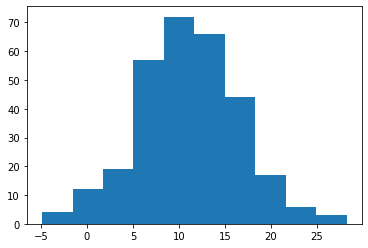

In [2]:
from matplotlib import pyplot as plt
from scipy.stats import norm

X = norm.rvs(loc=11.5, scale=5.5, size=300)
plt.hist(X)

* (a) Generate values from another Normal distribution and store them in a variable $Y$ and plot the histogram
* (b) Now plot the histogram of the combined distribution $Z = X + Y$. What do you notice about the mean and standard deviation of this combined distribution? *(Hint: Numpy has functions `mean` and `std`)*

<i style="color:red"> 
A7. The mean of Z is equal to the mean of X + the mean of Y.
The variance of Z will equal the sum of variance of X and the variance of Y 
</i>

Look up the functions for t-tests in the scipy.stats library https://docs.scipy.org/doc/scipy/reference/stats.html
+ Q8. What are the differences between the three functions `ttest_1samp`, `ttest_ind` and `ttest_rel` ?

<i style="color:red"> 
A8. "ttest_1samp" performs a one sample test, this test tries to prove wehter if the mean sample has any difference with the population mean. "ttest_ind" performs a two independent variables test, this test tries to prove wheter if the mean of variable X has any difference with the mean of variable Y. "ttest_rel" performs a two dependent (related) variables test, this test tries to prove wheter if the mean of variable X in time N has any difference with the mean of the same variable X in time another time N+M
</i>

## **2. T-tests using Python**
### **2.1 Prepare the data**

Using Pandas, the dataset `BaGS data Period5 - Climate Change Laws of the World.xls` revised before, will be loaded and analysed. 
Here the link to download it: [Data](https://canvas.maastrichtuniversity.nl/courses/6450/files/719570/download?download_frd=1). 

Remember to put the file in the same place where your notebook is.

In [1]:
# import the library
import pandas as pd

# directory to the file, it can be from own computer or from web
url = '../data/BaGS data Period5 - Climate Change Laws of the World.xls'

# read the url and save it as a variable called df, note we are using read_excel 
df = pd.read_excel(url)

Use `df.head()` to get the first rows of the dataframe

In [2]:
df.head(2)

,Title,Type,Country,Country_ISO,Region,SubRegion,Emergency_Framework,Document_Types,Document_Link,Document_Summary,...,Keyword_Biodiversity_Count,Keyword_Building_Count,Keyword_Coal_Count,Keyword_Deforestation_Count,Keyword_Education_Count,Keyword_Energy_Count,Keyword_Transport_Count,Keyword_Circular_Economy_Count,Keyword_Waste_Count,Keyword_Water_Count
0,Energy Sector Strategy 1387-1391 (2007/8-2012/3),executive,Afghanistan,AFG,Asia,Southern Asia,No Framework Specified,Strategy,Full text|https://climate-laws.org/rails/activ...,This strategy sets the vision and goals for th...,...,0,0,0,0,0,3,0,0,0,0
1,Rural Renewable Energy Policy (RREP),executive,Afghanistan,AFG,Asia,Southern Asia,Adaptation,Policy,Full text (PDF)|https://climate-laws.org/rails...,<div>This policy aims at creating better socia...,...,0,0,0,0,0,4,0,0,0,0


Use `df.describe()` to get summary statistics about the data

In [3]:
df.describe()

,Year_Document_Release,Year_Last_Amendment,Months_Between_Release_and_Last_Amendment,Months_Since_Release,Positive_Words,Negative_Words,Emergency_Sentiment_Rate,Summary_Words_Length,Keyword_Agriculture_Count,Keyword_Biodiversity_Count,Keyword_Building_Count,Keyword_Coal_Count,Keyword_Deforestation_Count,Keyword_Education_Count,Keyword_Energy_Count,Keyword_Transport_Count,Keyword_Circular_Economy_Count,Keyword_Waste_Count,Keyword_Water_Count
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,2010.483610,2010.483610,15.213777,122.440855,1.765321,1.780998,-0.049633,175.465083,0.170546,0.089311,0.620428,0.049406,0.031829,0.088361,3.354394,0.200000,0.004276,0.100713,0.232304
std,7.654731,7.654731,53.876371,91.661348,2.404652,2.793940,0.680802,165.286046,0.529444,0.394357,1.174370,0.339748,0.207817,0.432499,4.962005,0.670112,0.078488,0.411716,0.825394
min,1947.000000,1947.000000,0.000000,2.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,2008.000000,0.000000,64.000000,0.000000,0.000000,-0.666700,77.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,2012.000000,0.000000,105.000000,1.000000,1.000000,0.000000,134.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2015.000000,2015.000000,0.000000,153.000000,3.000000,2.000000,0.333300,218.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
max,2021.000000,2021.000000,475.000000,882.000000,24.000000,25.000000,1.000000,2946.000000,7.000000,6.000000,11.000000,6.000000,3.000000,10.000000,35.000000,10.000000,2.000000,7.000000,14.000000


There are quite some variables, we could nevertheless use SciPy to calculate more advanced statistics for a particular column

In [4]:
from scipy import stats

# save the column in object x
x = df['Months_Since_Release']

# function describe from scipy
stats.describe(x)

DescribeResult(nobs=2105, minmax=(2, 882), mean=122.44085510688836, variance=8401.8027026905, skewness=2.4882532019139423, kurtosis=11.64353214048741)

+ **Q9. Discuss in your group: are these population or sample statistics? how could you check?**

---
### **2.3. Independent variables: Comparing means using independent t-test****

An independent t-test compares the means of two independent samples to determine whether there is evidence that the expected population means of each sample are different. For example, you want to measure if there is a significant difference in the average carbon price of Manhattan (part of New York City) versus San Francisco, California.


In the following example, we are going to measure if there is a significant difference in the average number of policies in Africa versus America.

**Note:** In order to fully grasp the concepts in this part of the tutorial, it'll help to have familiarity with the following concepts: z-tests, hypothesis testing, p-values, normal distribution, standard deviation, standard error and the central limit theorem (which you should be familiar with from the lecture videos).

**Step 1. Setup Experiment**

I want to know if the number of policies is significantly different between a sample of law policy samples in Africa versus the Americas.

**Step 2. Set an Alpha Level and null Hypotheses**

Is there a significant difference in the average number of policies in Africa versus the Americas?

Our null hypothesis is that there is **NO** significant difference in the true population means for the average number of policies between both regions.

$H_0: \mu_1 = \mu_2$  
$H_a: \mu_1 \neq \mu_2$

**Step 3. Aggregate the data**

**REMEMBER** from semester 1: The **Level of observation** is by **policy document**, while the **Level of Analysis** we wish to conduct is by **region** therefore we need to perform an aggregation of the data:

In [5]:
# Filter the Africa region
df_Africa = df.query('Region == "Africa"')
# Filter the Americas region
df_Americas = df.query('Region == "Americas"')

In [6]:
# Advanced code with Pandas to get the number of policies Africa and Americas in different tables
# The main take away is two resulting table
df_Africa_table = df_Africa\
    .groupby('Country')\
    .count()['Title']\
    .reset_index()\
    .fillna(0)\
    .rename(columns={'Title':'n_policies'})

In [7]:
df_Africa_table.head(5)

,Country,n_policies
0,Algeria,13
1,Angola,21
2,Benin,3
3,Botswana,5
4,Burkina Faso,12


In [8]:
# Advanced code with Pandas to get the number of policies Africa and Americas in different tables
# The main take away is two resulting table
df_Americas_table = df_Americas\
    .groupby('Country')\
    .count()['Title']\
    .reset_index()\
    .fillna(0)\
    .rename(columns={'Title':'n_policies'})

In [9]:
df_Americas_table.head(5)

,Country,n_policies
0,Antigua and Barbuda,6
1,Argentina,18
2,"Bahamas, The",4
3,Barbados,4
4,Belize,3


**Step 4. Assumptions to Perform an Independent Samples t-test**

+ **Independence:** In the data collection process, I assumed the countries and documents were all independent of one another. There is no relationship in countries or regions for any of the countries.


**Step 5. Print the necessary statistics for each region**

In [19]:
n_africa = len(df_Africa_table['n_policies'])
n_americas = len(df_Americas_table['n_policies'])

print(f'Size N: \nAfrica {n_africa}\nAmericas {n_americas}')

Size N: 
Africa 53
Americas 35


In [23]:
mean_africa = round(df_Africa_table['n_policies'].mean(),2)
mean_americas = round(df_Americas_table['n_policies'].mean(),2)

print(f'Mean: \nAfrica {mean_africa}\nAmericas {mean_americas}')

Mean: 
Africa 8.17
Americas 11.57


In [25]:
std_africa = round(df_Africa_table['n_policies'].std(),2)
std_americas = round(df_Americas_table['n_policies'].std(),2)

print(f'Standard deviation: \nAfrica {std_africa}\nAmericas {std_americas}')

Standard deviation: 
Africa 5.57
Americas 8.19


Simply observing the above statistics, it is not possible to determine if there are statistically significant differences in the mean. We must therefore conduct a test.

**Steps 6. Calculate the t-statistic**


There's a method in the Scipy package for performing independent t-tests called [ttest_ind()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). We set the following arguments:

+ `a` to one sample of values
+ `b` to the second sample of values
+ `equal_var` to `False` since we assume the samples have unequal population variances
+ `nan_policy` to `omit` since the two samples are unequal sizes and SciPy must handle that discrepancy appropriately + with equations on the backend


In [26]:
stats.ttest_ind(a = df_Americas_table['n_policies'],
                b = df_Africa_table['n_policies'], 
                equal_var = False, 
                nan_policy = 'omit')

Ttest_indResult(statistic=2.150150185167128, pvalue=0.035991117358749554)

**Step 7. Interpretation of Results (p-value)**

<i style="color:red"> 
Our $p-value$ with $p = 0.036$ is smaller than the $0.05$ significance level (chosen by convention). Then, there is sufficient evidence to reject the null hypothesis. Thus, there is a significant difference in the mean of both variables.

**We can conclude that the is evidence that suggests that countries from the Americas produce more laws on climate change on average $(11.57 ± 8.19)$ than the average count $(8.17 ± 5.57)$ in Africa**
    </i>

---

**Q.10. In your group, replicate same procedure but with different regions (e.g. Asia and Europe)**

**Step 1. Setup Experiment**

Is the number of policies significantly different in average between Asia and Europe?

**Step 2. Set an Alpha Level and null Hypotheses**  

$H_0: \mu_1 = \mu_2$  
$H_a: \mu_1 \neq \mu_2$ (number of policies in average in Asia is different than the number of policies in average in Europe)  

with $\alpha = 0.05$  

**Step 3. Aggregate the data**

In [36]:
df_Asia = df.query('Region == "Asia"')
df_Europe = df.query('Region == "Europe"')

# Same code than above, only the names of the tables are changed
df_Asia_table = df_Asia\
    .groupby('Country')\
    .count()['Title']\
    .reset_index()\
    .fillna(0)\
    .rename(columns={'Title':'n_policies'})

df_Europe_table = df_Europe\
    .groupby('Country')\
    .count()['Title']\
    .reset_index()\
    .fillna(0)\
    .rename(columns={'Title':'n_policies'})

**Sep 4 Test**
+ It is performed an Independence T-test: Since the laws and policies from different continents are independent

**Step 5. Descriptive Statistics**

In [31]:
n_asia = len(df_Asia_table['n_policies'])
n_europe = len(df_Europe_table['n_policies'])

print(f'Size N: \nAsia {n_asia}\nEurope {n_europe}')

Size N: 
Asia 49
Europe 43


In [33]:
mean_asia = round(df_Asia_table['n_policies'].mean(),2)
mean_europe = round(df_Europe_table['n_policies'].mean(),2)

print(f'Mean: \nAsia {mean_asia}\nEurope {mean_europe}')

Mean: 
Asia 10.31
Europe 13.49


In [34]:
std_asia = round(df_Asia_table['n_policies'].std(),2)
std_europe = round(df_Europe_table['n_policies'].std(),2)

print(f'Standard deviation: \nAsia {std_asia}\nEurope {std_europe}')

Standard deviation: 
Asia 7.95
Europe 9.21


**Steps 6. Calculate the t-statistic**

In [35]:
stats.ttest_ind(a = df_Asia_table['n_policies'],
                b = df_Europe_table['n_policies'], 
                equal_var = False, 
                nan_policy = 'omit')

Ttest_indResult(statistic=-1.762009856448094, pvalue=0.08172222510331173)

<i style="color:red"> 
The $p-value$ with $p = 0.081$ is somewhat greater than $0.05$ the significance level (chosen by convention). Therefore there is no statistical evidence to reject the null hypothesis therefore we can't conclude any result.

**We can report that even though there is a visible slightly difference in the number of climate change-related laws produced in Europe in average $(13.49 ± 9.21)$ versus the average produced in Asia $(10.31 ± 7.95)$, there is no statistical support this difference**
    
<i/>

---
### **2.3 Dependent variables: Comparing means using paired t-test**


$H_0: \mu_1 = \mu_2$  
$H_a: \mu_1 ≠ \mu_2$


The Paris agreement was adopted by consensus on 12 December 2015, as a reaction, many countries adapted national laws in order to align external policy actions.

Therefore, we would like to know if there is a difference in the number of climate change laws before and after the Paris agreement at the country level, and see if, in reality, certain countries produced more laws and policies after these international treaties.


**IMPORTANT** The **Level of observation** is by **policy document**, while the **Level of Analysis** we wish to conduct is by **country** therefore we need to perform an aggregation of the data.

In [37]:
# Filter the policy documents after 2015
df_after_2015 = df[df['Year_Document_Release'] >= 2015]

# Filter the policy documents before 2015
df_before_2015 = df[(df['Year_Document_Release'] < 2015) & (df['Year_Document_Release'] >2010)]

In [38]:
# Advanced code with Pandas to get the number of policies before and after the Paris agreement
# The main take away is the resulting table
df_countries = df_before_2015\
    .groupby('Country')\
    .count()['Title']\
    .reset_index()\
    .merge(df_after_2015.groupby('Country').count()['Title'],
           on='Country', how='left')\
    .fillna(0)\
    .rename(columns={'Title_x':'Before_2015','Title_y':'After_2015'})

In [39]:
df_countries.head(5)

,Country,Before_2015,After_2015
0,Afghanistan,6,5.0
1,Albania,1,1.0
2,Algeria,5,0.0
3,Andorra,4,2.0
4,Angola,10,7.0


**Q11. Now follow the steps above to perform the *appropriate* t-test to address the research question: Did the number of climate policy documents change after the Paris agreement?
Don't forget to include a discussion of the interpretation of the test outcome**

+ It necessary to perform an Paired T-test: Since we wish to compare the effect of an event in time when measuring the average number of policies produced by country.
+ In the experiment it is taken 5 years after the Paris agreement and 5 years before, to fix the effect of policy acumulation in time.
+ Exactly the same countries are selected, that's the reason of this line   
    `.merge(df_after_2015.groupby('Country').count()['Title'], on='Country', how='left')`
- Descriptive Statistics:

In [44]:
# We only have one variable this time
n_World = len(df_countries['Country'])

print(f'Size N: \nWorld {n_World}')

Size N: 
World 169


In [49]:
mean_before2015 = round(df_countries['Before_2015'].mean(),2)
mean_after2015 = round(df_countries['After_2015'].mean(),2)

print(f'Mean: \nBefore 2015 (Paris agreement) {mean_before2015}\nAfter 2015 (Paris agreement) {mean_after2015}')

Mean: 
Before 2015 (Paris agreement) 3.53
After 2015 (Paris agreement) 3.56


In [50]:
std_before2015 = round(df_countries['Before_2015'].std(),2)
std_after2015 = round(df_countries['After_2015'].std(),2)

print(f'Standard deviation: \nBefore 2015 (Paris agreement) {std_before2015}\nAfter 2015 (Paris agreement) {std_after2015}')

Standard deviation: 
Before 2015 (Paris agreement) 2.52
After 2015 (Paris agreement) 3.83


**- Calculate the t-statistic for paired variables**

In [56]:
stats.ttest_rel(a = df_countries['Before_2015'],
                b = df_countries['After_2015'])

Ttest_relResult(statistic=-0.12968760355073727, pvalue=0.8969687333440459)

<i style="color:red"> 
The $p-value$ with $p = 0.896$ is extremely high, and nowhere close to $0$. Therefore there is no statistical evidence to reject the null hypothesis therefore we can't conclude any result.

**We can report that in a worldwide perspective, the effect Paris agreement can't be assessed, therefore perhaps comparing at the regional level can be the following steps.**
<i/>